In [173]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data
from skimage.filters import try_all_threshold

img=mpimg.imread('cropped_Wild004.tif')
original_img = img[:,:,0]
#plt.imshow(lum_img)

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


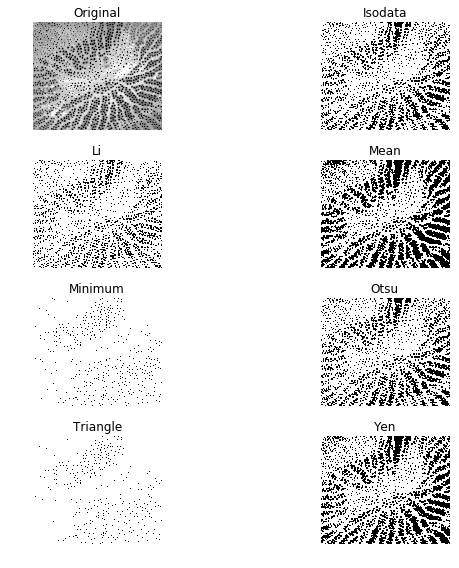

In [174]:

fig, ax = try_all_threshold(original_img, figsize=(10, 8), verbose=False)
plt.show()
#mean seems to work pretty well on this one
#yen looks ok, but it looks better on others

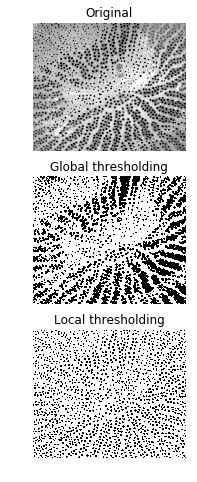

In [175]:
#change the block size or offset to make it work better? 
#we tried both but it didn't seem to help

from skimage.filters import threshold_yen, threshold_local



global_thresh = threshold_yen(original_img)
binary_global = original_img > global_thresh

block_size = 23
local_thresh = threshold_local(original_img, block_size, offset=10)
binary_local = original_img > local_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(original_img)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()


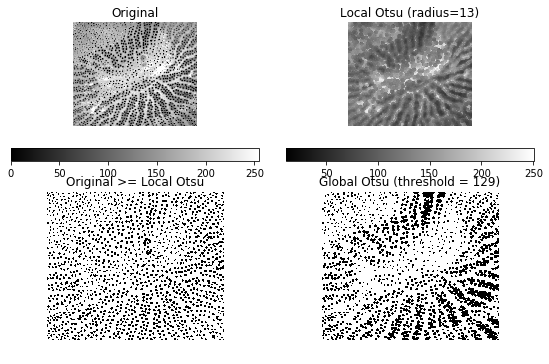

In [176]:
#so this does look better when you zoom out but there are way too many dots
#the middle and top left are better, but the path is still hard to see
#local also takes longer

from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
img = img_as_ubyte(original_img)

radius = 13
selem = disk(radius)

local_otsu = rank.otsu(img, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = img >= threshold_global_otsu

fig, axes = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True)
ax = axes.ravel()
plt.tight_layout()

fig.colorbar(ax[0].imshow(img, cmap=plt.cm.gray),
             ax=ax[0], orientation='horizontal')
ax[0].set_title('Original')
ax[0].axis('off')

fig.colorbar(ax[1].imshow(local_otsu, cmap=plt.cm.gray),
             ax=ax[1], orientation='horizontal')
ax[1].set_title('Local Otsu (radius=%d)' % radius)
ax[1].axis('off')

ax[2].imshow(img >= local_otsu, cmap=plt.cm.gray)
ax[2].set_title('Original >= Local Otsu' % threshold_global_otsu)
ax[2].axis('off')

ax[3].imshow(global_otsu, cmap=plt.cm.gray)
ax[3].set_title('Global Otsu (threshold = %d)' % threshold_global_otsu)
ax[3].axis('off')

plt.show()